THE SPARKS FOUNDATION @APRIL2023

NAME: SUDARSANAM BHARATH

TASK NO: 2

TASK TITLE: PREDICTION USING UNSUPERVISED MACHINE LEARNING 

(DESCRIPTION): From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.
● Use R or Python or perform this task
● Dataset : https://bit.ly/3kXTdox

TO FIND: VISUALLY REPRESENT THE CLUSTERS IN A DATASET

In [23]:
# importing all the essential libraries
import pandas as pd #datamanipulation library
import matplotlib.pyplot as plt #plotting library
import numpy as np #powerful computation library
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore") #terminates the program immediately if an error occurs

In [9]:
# Reading the data from the provided URL
data = pd.read_csv('Task 2 Iris.csv')

In [10]:
#examine the shape of dataset
data.shape

(150, 6)

In [11]:
#extracting the first five examples of the dataset
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# To get the columns names in the dataset.
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
# Info to check for any null values and data type of Features.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


Describing a pandas dataframe can be useful in obtaining quantile values because it provides a summary of various statistical measures, including the count, mean, standard deviation, minimum and maximum values, and quartile values.

In [43]:
# Describing to get quantile values 
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
# The unique values present in target feature
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
#drop id column
data.drop(columns=('Id'),inplace = True)

In [56]:
#spliting the data
features = data.iloc[:,:-1]   # All the Independent Variables.
label = data.iloc[:,-1]       # Dependent Variable.

print("Dimensionality of the features dataset: ", features.shape)
print("Length of the label dataset: ", len(label))

features.head()

Dimensionality of the features dataset:  (150, 4)
Length of the label dataset:  150


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0.5, 1.0, 'Elbow')

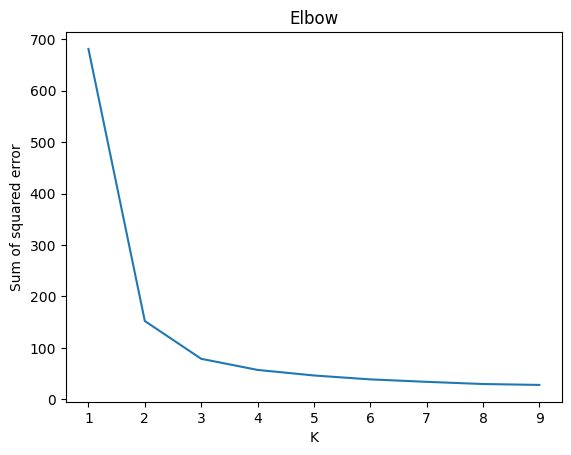

In [50]:
#Elbow method 
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters= k)
    km.fit(features)
    sse.append(km.inertia_) 


plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.title('Elbow')

In [57]:
# Applying kmeans to the dataset / Creating the kmeans classifier
features = features.values
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(features)
y_kmeans
label.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [53]:
## Compare Actual vs Predicted
pd.crosstab(label, y_kmeans)

col_0,0,1,2
Species,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36


VISUALIZING THE FEATURE SET BEFORE CLUSTERING

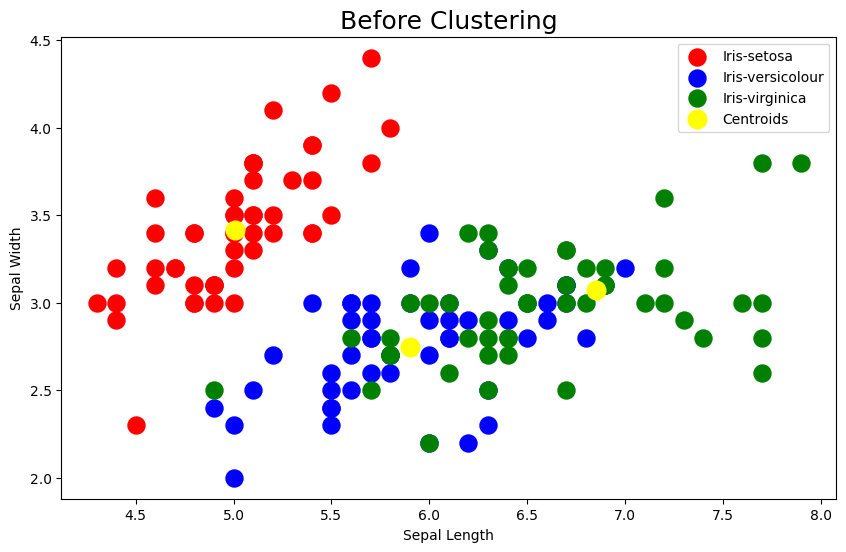

In [58]:
# Visualising the clusters
plt.figure(figsize= (10,6))
plt.scatter(features[label == 'Iris-setosa', 0], features[label == 'Iris-setosa', 1], s = 150, c = 'red', label = 'Iris-setosa')
plt.scatter(features[label == 'Iris-versicolor', 0], features[label == 'Iris-versicolor', 1], s = 150, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[label == 'Iris-virginica', 0], features[label == 'Iris-virginica', 1], s = 150, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 180, c = 'yellow', label = 'Centroids')
plt.title('Before Clustering', fontsize= 18)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

VISUALIZING THE FEATURE SET AFTER CLUSTERING

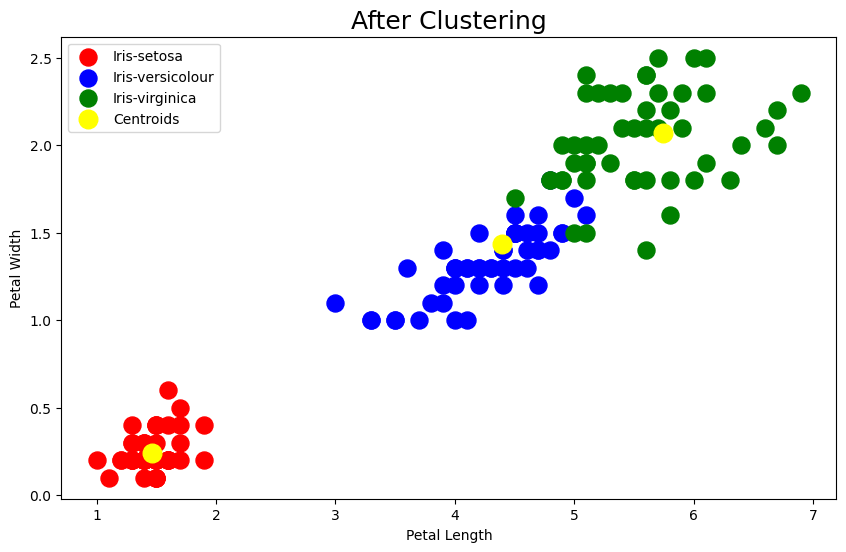

In [59]:
#Clustring based on Petal Length and Petal Weight.
# Visualising the clusters
plt.figure(figsize= (10,6))
plt.scatter(features[label == 'Iris-setosa', 2], features[label == 'Iris-setosa', 3], s = 150, c = 'red', label = 'Iris-setosa')
plt.scatter(features[label == 'Iris-versicolor', 2], features[label == 'Iris-versicolor', 3], s = 150, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features[label == 'Iris-virginica', 2], features[label == 'Iris-virginica', 3], s = 150, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s = 180, c = 'yellow', label = 'Centroids')

plt.title('After Clustering', fontsize= 18)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()